In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install split-folders


In [3]:
# import splitfolders 
# input_folder = "/content/drive/MyDrive/Data for test"
# output = "/content/drive/MyDrive/Data for test/data" 
# splitfolders.ratio(input_folder, output=output, seed=6, ratio=(.8, .1, .1)) 

In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.layers import AveragePooling2D
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Input
# from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_bed_dir = os.path.join('/kaggle/input/furniture/data/train/Bed/')
train_chair_dir = os.path.join('/kaggle/input/furniture/data/train/Chair/')
train_sofa_dir = os.path.join('/kaggle/input/furniture/data/train/Sofa/')


val_bed_dir = os.path.join('/kaggle/input/furniture/data/val/Bed/')
val_chair_dir = os.path.join('/kaggle/input/furniture/data/val/Chair/')
val_sofa_dir = os.path.join('/kaggle/input/furniture/data/val/Sofa/')

In [3]:
train_bed_names = os.listdir(train_bed_dir)
train_chair_names = os.listdir(train_chair_dir)
train_sofa_names = os.listdir(train_sofa_dir)

val_bad_names = os.listdir(val_bed_dir)
val_chair_names = os.listdir(val_chair_dir)
val_sofa_names = os.listdir(val_sofa_dir)

print(len(train_bed_names))
print(len(train_chair_names))
print(len(train_sofa_names))

print(len(val_bad_names))
print(len(val_chair_names))
print(len(val_sofa_names))

78
79
79
9
9
9


In [15]:
pre_model = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [27]:
for layer in pre_model.layers:
  layer.trainable=False

In [28]:
last_output = pre_model.output

In [31]:
#Custom CNN
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    
# #     tf.keras.layers.Conv2D(8, (3,3), activation="relu"),
# #     tf.keras.layers.BatchNormalization(),
    
#     tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu"),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.BatchNormalization(),

# #     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     # tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.2),
#     #tf.keras.layers.GlobalAveragePooling2D(),
    

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     # tf.keras.layers.Dense(64, activation="relu"),
#     # tf.keras.layers.Dropout(0.2),
#     # tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(3, activation='softmax')

# ])
# print(model.summary())

In [32]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(4096,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(3,activation='softmax')(x)

In [33]:
model =tf.keras.Model(pre_model.input,x)
# model.summary()

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip = True,
                                   fill_mode='nearest'
                                  )

val_datagen = ImageDataGenerator(rescale=1./255)

bs = 8 # Batch Size

In [36]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/furniture/data/train',
                                                    batch_size = bs,
                                                    class_mode='categorical',
                                                    target_size=(224,224))

val_generator = val_datagen.flow_from_directory('/kaggle/input/furniture/data/test',
                                                    batch_size = bs,
                                                    class_mode='categorical',
                                                    target_size=(224,224))


Found 236 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [37]:
history = model.fit(train_generator,
                              validation_data=val_generator,
                              # steps_per_epoch=(len(train_bed_names)+len(train_chair_names)+len(train_sofa_names))/bs,
                      #  validation_steps=val_generator.samples//val_generator.batch_size,
                              epochs=3
                    )

Epoch 1/3
30/30 [==============================] - 19s 565ms/step - loss: 3.8848 - accuracy: 0.7712 - val_loss: 2.1013e-05 - val_accuracy: 1.0000
Epoch 2/3
30/30 [==============================] - 16s 521ms/step - loss: 0.1903 - accuracy: 0.9746 - val_loss: 0.0908 - val_accuracy: 0.9697
Epoch 3/3
30/30 [==============================] - 15s 500ms/step - loss: 0.1848 - accuracy: 0.9788 - val_loss: 1.9506e-06 - val_accuracy: 1.0000


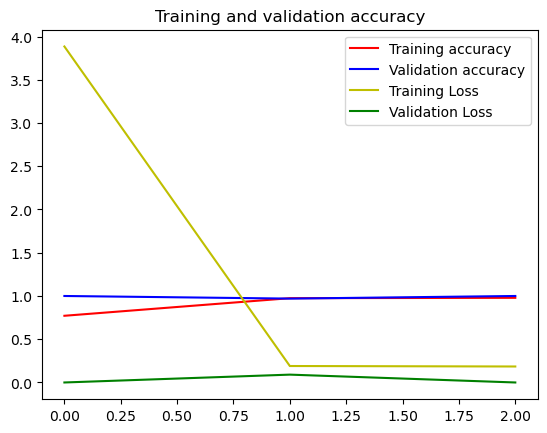

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [44]:
model.save_weights('/kaggle/working/w/')


In [42]:
model.save('/kaggle/working/final.h5')
print('Model Saved!')

Model Saved!


In [40]:
! pip install imutils

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=b5663a154caca9923aa923b50c54e91ab17fa9c906661b2f21adc74e050f9ae1
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [41]:
from PIL import Image, ImageOps
import cv2
from imutils import paths

imagePaths = list(paths.list_images("/kaggle/input/furniture/data/test/"))
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
for imagePath in imagePaths:

    np.set_printoptions(suppress=True)
#     path = '/kaggle/input/furniture/data/test/Bed/Aiden Velvet Bed.jpg'
    print(imagePath.split('/')[-1])
    image = cv2.imread(imagePath)
    size = (224, 224)
    image = cv2.resize(image,size)

    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model.predict(data)
    output = str(['Bed','Chair','Sofa'][prediction[0].argmax()])
    print(output)

Baxton Studio Alaise Modern Classic Grey Linen Tufted Scroll Arm Chesterfield Sofa.jpg
1/1 [==============================] - 1s 777ms/step
Sofa
Armen Living Cobra Mid-Century Modern Sofa in Dark Gray Linen and Walnut Legs.jpg
1/1 [==============================] - 0s 23ms/step
Sofa
Bag Sofa Velvet Green(1).jpg
1/1 [==============================] - 0s 25ms/step
Sofa
Armen Living Odyssey Sofa in Brushed Stainless Steel finish with Grey Tweed and Black Nail heads.jpg
1/1 [==============================] - 0s 24ms/step
Sofa
Adept Performance Velvet Sofa.jpg
1/1 [==============================] - 0s 24ms/step
Sofa
Artena 3 Seater Sofa.jpg
1/1 [==============================] - 0s 22ms/step
Sofa
Avalon Sofa.jpg
1/1 [==============================] - 0s 24ms/step
Sofa
ARIA.jpg
1/1 [==============================] - 0s 22ms/step
Sofa
Armen Living Zanna Contemporary Sofa in Genuine Dark Brown Leather with Brown Wood Legs.jpg
1/1 [==============================] - 0s 25ms/step
Sofa
2 Seater So